<a href="https://colab.research.google.com/github/tensorbytes0202/Deep-learning/blob/main/Zero_initialization_relu_adi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/ushape.csv')

In [5]:
df.head()

,X,Y,Class
0,2.1200,-0.0462,1.0
1,0.8820,-0.0758,0.0
2,-0.0551,-0.0373,1.0
3,0.8300,-0.5390,1.0
4,2.1100,0.6620,1.0


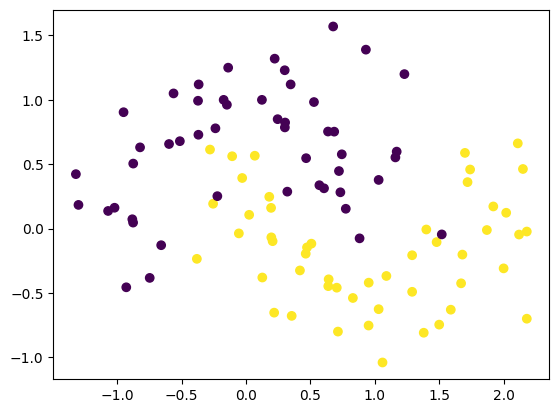

In [6]:
plt.scatter(df['X'],df['Y'],c = df['Class'])

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(3,activation = 'relu',input_dim=2))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:

model.get_weights()

[array([[ 0.5851667 , -0.34463358, -0.36389285],
        [-0.7777157 ,  0.11155021, -0.8465563 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.92941034],
        [-0.04898131],
        [-0.0074662 ]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
initial_weights = model.get_weights()

In [13]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)
initial_weights[1] = np.ones(model.get_weights()[1].shape)
initial_weights[2] = np.ones(model.get_weights()[2].shape)
initial_weights[3] = np.ones(model.get_weights()[3].shape)


In [15]:
model.set_weights(initial_weights)

In [16]:
model.get_weights()

[array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32),
 array([1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [17]:
initial_weights = model.get_weights()

In [19]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [20]:
model.set_weights(initial_weights)

In [21]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5164 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5685 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4954 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4914 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [26]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.02121171], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

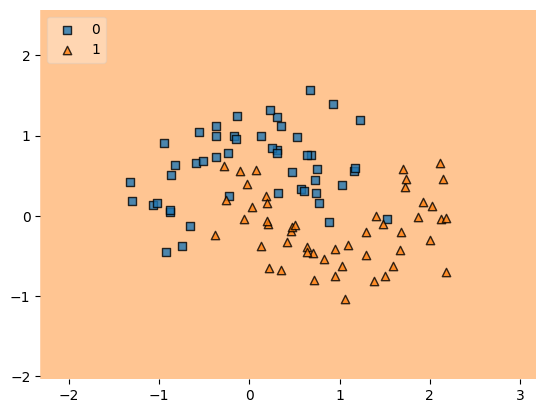

In [28]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)